# Is there a significant difference in CO2 emissions between different income categories?

In [1]:
from src.preprocessing.categorisations.income_categories import emissions_df, income_categories

# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

from scipy.stats import kruskal
from scikit_posthocs import posthoc_dunn

In [2]:
# Descriptive Statistics by GDP_Category
summary_by_category = emissions_df.groupby('GDP_Category').describe()
print(summary_by_category)

# Get unique years in the 'Year' column
years = emissions_df['Year'].unique()

                       Year                                                 \
                      count         mean       std     min     25%     50%   
GDP_Category                                                                 
Low-income             25.0  1996.480000  4.011650  1992.0  1993.0  1995.0   
Lower-middle-income   284.0  2001.531690  6.991847  1992.0  1996.0  2000.0   
Upper-middle-income   842.0  2003.942993  7.741150  1992.0  1997.0  2003.0   
High-income          1333.0  2006.566392  7.585121  1992.0  2000.0  2007.0   

                                    Country.GDP                ...  \
                        75%     max       count          mean  ...   
GDP_Category                                                   ...   
Low-income           1999.0  2005.0        25.0  1.636426e+10  ...   
Lower-middle-income  2006.0  2018.0       284.0  3.705946e+11  ...   
Upper-middle-income  2011.0  2018.0       842.0  6.726798e+11  ...   
High-income          2013.0  2018

In [3]:
# Hypothesis Formulation
# Example hypotheses
# H0: There is no significant difference in CO2 emissions between income categories.
# H1: There is a significant difference in CO2 emissions between income categories.

# Hypothesis Testing (ANOVA)
result_anova = stats.f_oneway(emissions_df['Emissions.Production.CO2.Total'][emissions_df['GDP_Category'] == 'Low-income'],
                               emissions_df['Emissions.Production.CO2.Total'][emissions_df['GDP_Category'] == 'Lower-middle-income'],
                               emissions_df['Emissions.Production.CO2.Total'][emissions_df['GDP_Category'] == 'Upper-middle-income'],
                               emissions_df['Emissions.Production.CO2.Total'][emissions_df['GDP_Category'] == 'High-income'])

print(result_anova)

F_onewayResult(statistic=4.3687043808898816, pvalue=0.004478782488899218)


In [4]:
def anova_on_year(year, col = 'Emissions.Production.CO2.Total'):
    
    # Extract data for the current year
    data_by_year = emissions_df[emissions_df['Year'] == year]

    # Perform ANOVA
    category = data_by_year['GDP_Category']
    col_data = data_by_year[col]

    result_anova = stats.f_oneway(
        col_data[category == income_categories[0]],
        col_data[category == income_categories[1]],
        col_data[category == income_categories[2]],
        col_data[category == income_categories[3]],
    )

    # Append p-value to the list
    return result_anova.pvalue


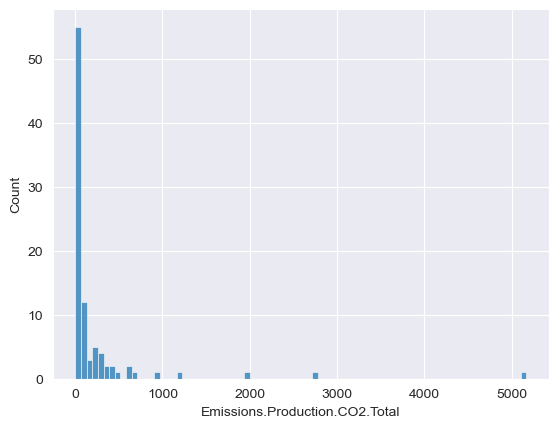

[1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018]
[0.5206509265006424, 0.639164643838823, 0.6195889867129427, 0.6954718050006647, 0.6487473948152335, 0.6852044374581068, 0.6755713558661814, 0.7050264741362249, 0.7720518158639929, 0.8018968344790788, 0.84218210244985, 0.8237034438022646, 0.8842264711823354, 0.9102228655574554, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


/opt/homebrew/Caskroom/mambaforge/base/envs/stats/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4133: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


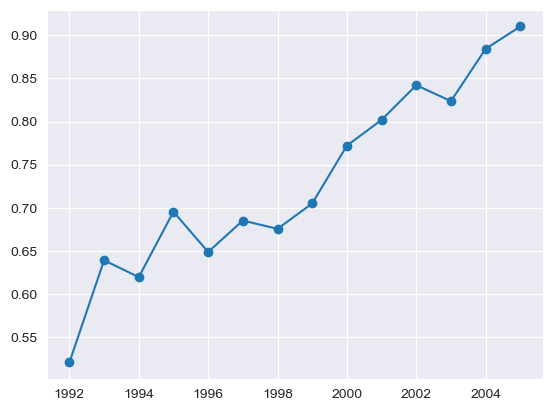

In [7]:
def p_values_over_years(col):
    # Initialize an empty list to store p-values for each year
    p_values = []

    sns.histplot(emissions_df[emissions_df['Year'] == years[0]][col])
    plt.show()

    # Loop through each year
    for year in years:
        # Append p-value to the list
        p_values.append(anova_on_year(year, col))

    # Plot the p-values over the years
    assert len(p_values) == len(years)
    print(f"{years}")
    print(f"{p_values}")
    
    plt.plot(years, p_values, marker='o', linestyle='-')
    # plt.xlabel('Year')
    # plt.ylabel('P-value')
    # plt.title('ANOVA P-values Over the Years')
    # plt.suptitle(r'$H_0$: no significant difference in $CO^{2}$ emissions <=> income categories.')
    # plt.grid(True)
    plt.show()

p_values_over_years('Emissions.Production.CO2.Total')

## Mini-Conclusion

It seems that over the years we become less and less confident about 
separating effect (Emissions.Production.CO2.Total) from economical categories

## Since the assumption of normality doesn't hold (as seen in the QQ plots), we will do a log transformation to the exponential distribution of the CO2 total emissions to make it more symmetric

for year 1992 p-value is 0.006991788978467282


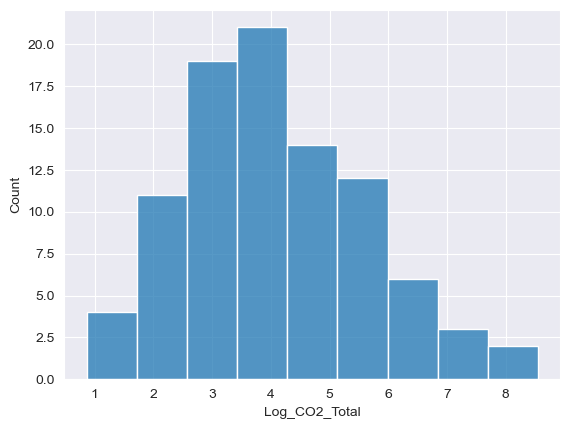

[1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018]
[0.006991788978467282, 0.0004507946965928294, 0.0001642113441577249, 0.001346594027935775, 0.002777761094814899, 0.0012834501359326263, 0.002067110259954964, 0.005425317670121706, 0.0037192025640488307, 0.003191087967494456, 0.015054044172580617, 0.010223619512921599, 0.006570670734867602, 0.006056188447124218, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


/opt/homebrew/Caskroom/mambaforge/base/envs/stats/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4133: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


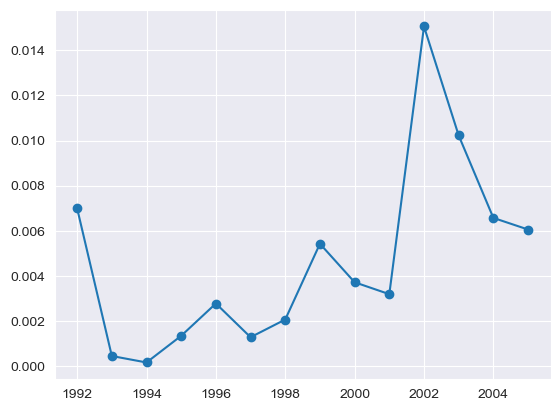

In [8]:
log_co2_key = 'Log_CO2_Total'
co2_total_key = 'Emissions.Production.CO2.Total'

emissions_df[log_co2_key] = np.log1p(emissions_df[co2_total_key])

year0 = 1992
print(f'for year {year0} p-value is {anova_on_year(year0, log_co2_key)}')
p_values_over_years(log_co2_key)

## Kruskal-Wallis test

In [39]:
chosen_year = year0
df = emissions_df[emissions_df['Year'] == chosen_year]

income_category_key = 'GDP_Category'
income_category_groups = [df[df[income_category_key] == category][log_co2_key] for category in income_categories]

# Perform the Kruskal-Wallis test
kruskal_statistic, p_value = kruskal(*income_category_groups)

# Display the results
print(f'for the year {chosen_year}')
print(f"Kruskal-Wallis Statistic: {kruskal_statistic}")
print(f"P-value: {p_value}")

# Check for statistical significance (common significance level is 0.05)
if p_value < 0.05:
    print("There are significant differences in CO2 total emissions among income categories.")
    
    # Perform post-hoc analysis using Dunn's test
    posthoc_results = posthoc_dunn(df, val_col=log_co2_key, group_col=income_category_key, p_adjust='holm')
    
    # Display post-hoc results
    print("\nPost-hoc Dunn's test results:")
    print(posthoc_results)
else:
    print("There are no significant differences in CO2 total emissions among income categories.")


for the year 1992
Kruskal-Wallis Statistic: 11.034674128138704
P-value: 0.011539849429870528
There are significant differences in CO2 total emissions among income categories.

Post-hoc Dunn's test results:
                     Low-income  Lower-middle-income  Upper-middle-income  \
Low-income             1.000000             0.533883             0.117654   
Lower-middle-income    0.533883             1.000000             0.533883   
Upper-middle-income    0.117654             0.533883             1.000000   
High-income            0.030971             0.117654             0.533883   

                     High-income  
Low-income              0.030971  
Lower-middle-income     0.117654  
Upper-middle-income     0.533883  
High-income             1.000000  


The posthoc_dunn function from scikit-posthocs performs pairwise comparisons between groups and adjusts the p-values for multiple testing. In this example, the p_adjust='holm' argument is used for Holm's method for multiple testing correction. You can choose other methods if needed
.

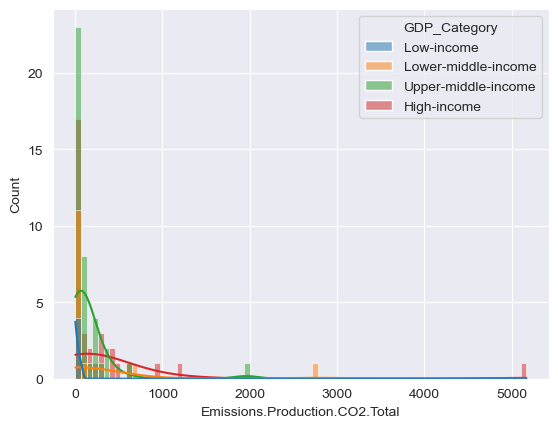

In [47]:
# Replace 'income_category' with the actual column name in your DataFrame
sns.histplot(data=emissions_df[emissions_df['Year'] == years[0]], x=co2_total_key, hue=income_category_key, multiple='layer', kde=True)
plt.show()

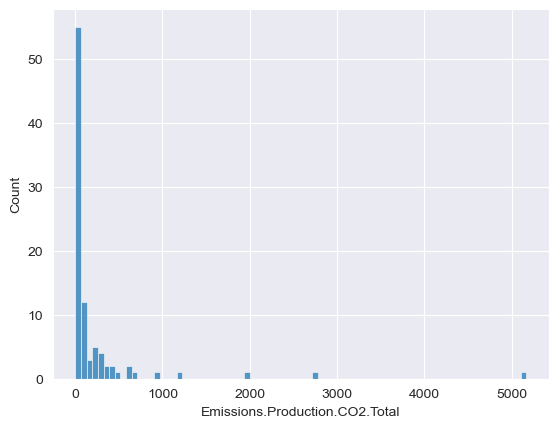

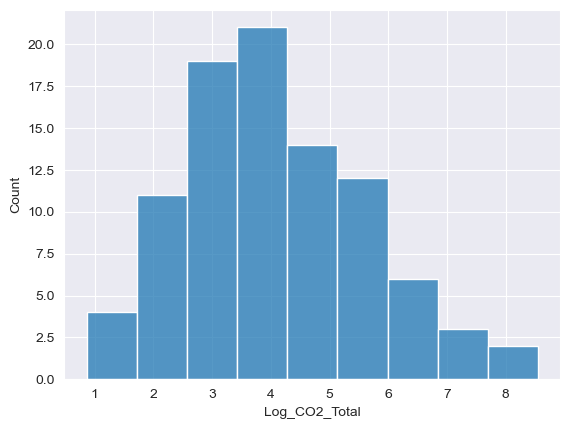

In [49]:
sns.histplot(emissions_df[emissions_df['Year'] == years[0]][co2_total_key])
plt.show()
sns.histplot(emissions_df[emissions_df['Year'] == years[0]][log_co2_key])
plt.show()


2018